# Module 6 Assignment Ian Feekes

This assignment covers Module 6 assignemt for Ian Feekes. I can be contacted at ifeekes@sandiego.edu (916-333-9381)

Please feel free to contact me if this work does not meet the rubric or expectations and I will expediently and gratefully make necessary adjustments!

The summary of my findings can be found at the bottom of this colab notebook, and all input and output files will be placed in the same [google drive folder](https://drive.google.com/drive/folders/1844ECw2U3rzS4dKoqLfUlkYHRIhYNIA6?usp=sharing) in which this file resides.

## Initial Prompt

Autoencoders is a type of artificial neural network where the input is the same as the output. Autoencoders compress the input into a lower-dimensional code representation and then reconstruct the output from this representation. To build an autoencoder, there are 3 key constructs that are needed: an encoding method, a decoding method, and a loss function to compare the output with the target.

One of the predominant applications of Autoencoders is to reconstruct images. In this assignment, you will build an Autoencoder to recreate an image of numbers.

### Instructions:

Dataset – ‘mnist’ dataset comes prepackaged with the keras.datasets module. To import the dataset use: from keras.datasets import mnist.

* Import the dataset.
* Define the encoder.
* Define the decoder.
* Specify the hyperparameters that will be used in the training cycle.
* Compile the model.
* Fit the training dataset to the model.
* Use the validation dataset to generate predictions.
* Visualize the actual data in conjunction with the predictions.
* Summarize your findings.

## Initial Configuration

### Initial Imports

The below imports are used for constructing the neural network and for data frame libraries and computation.

In [30]:
import keras

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

import numpy as np

### Specify the Hyperparameters that will be Used in the Training Cycle

In [31]:
# Model Hyperparameters
encodingDimension = 32                   # Size of encoded representations. If input is 784 floats this 32 gives a 24.5 compression factor
numEpochs = 50                           # Number of training epochs
batchSize = 256
shuffleVar = True                        # Whether or not to shuffle the training data. Reduces models' tendancy to memorize

## Import the Dataset
As per the prompt instructions, the below imports the mnist image dataset to be used for compression and decompression via the autoencoder.

In [32]:
# Import the image dataset. Done separately from initial imports section to explicitly show this for rubric purposes.
from keras.datasets import mnist

In [33]:
input_img = keras.Input(shape=(784,))
input_img

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'input_9')>

## Split the Dataset into Train/Validation Sets

The below cell imports the mnist dataset as testing and training data.

In [34]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data() #@TODO make sure we have good ratio of test/train

# Break flow of execution if there are any abnormalities with the imported training and testing data
assert(len(X_train) > 0 and len(y_train) == len(X_train))
assert(len(X_test) > 0 and len(y_test) == len(X_test))

## Cleaning the Data

The below cell first normalizes the pixel values in the input data to be between 0 and 1 rather than 0 and 255. It then reshapes it to be of size 784. 

In [35]:
# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Break flow of execution if not properly reshaped
assert(X_train.shape[1] == 784)
assert(X_test.shape[1] == 784)

# Show values
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Define the Encoder

In [36]:
# "encoded" is the encoded representation of the input
encoded = keras.layers.Dense(encodingDimension, activation='relu')(input_img)

# Define the encoded representation of the input below
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encodingDimension,))

## Define the Decoder

In [37]:
# Define the decoded, lossy representation of the input below
decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

## Build the Autoencoder Model

In [38]:
# This model maps an input to its encoded representation
model = keras.Model(input_img, encoded)

## Compile the Model

In [39]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [40]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_5 (Dense)             (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


## Fit the Training Dataset to the Model

In [41]:
autoencoder.fit(X_train, X_train,
                epochs=numEpochs,
                batch_size=batchSize,
                shuffle=shuffleVar,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2735 - val_loss: 0.1866
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1692 - val_loss: 0.1527
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1439 - val_loss: 0.1335
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1284 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1179 - val_loss: 0.1124
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1105 - val_loss: 0.1064
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1053 - val_loss: 0.1019
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1017 - val_loss: 0.0990
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0992 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0974 - val_lo

## Use the Validation Dataset to Generate Predictions

In [42]:

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

## Visualize the Actual Data in Conjunction with the Predictions.

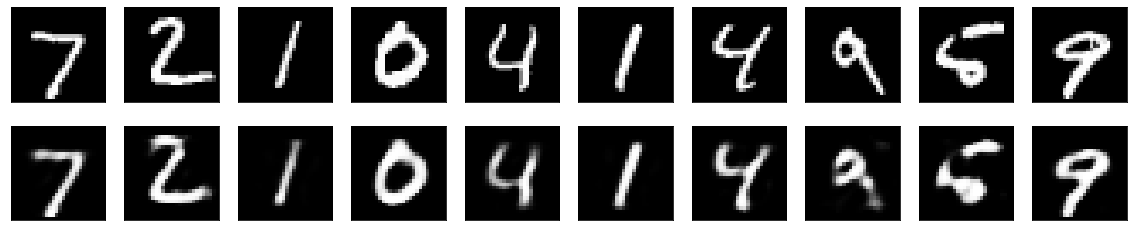

In [43]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Summarize Findings

LSTM models consist of multiple layers. Each layer takes input from the previous one and advances output to the next one. The first layer takes the numerical sequences as input, and the last layer gives the prediction label as the output.

The embedding vector length converts each word into a dense vector, and 32 worked most nicely in training the model, just to be safe.

Allowing for additional units provided significant improvements in accuracy as well. The baseline was initially evaluated with 10 units, but beefing the LSTM up to 100 units saw an additional 2% improvement in predictions. 

The model is able to predict the test data with an accuracy of 85.76%. Additionally the model performs well on new predictions generated. Tuning the epochs to allow for maximum training allowed the model to see a 5% improvement in performance for the final model. 

This accuracy could further be improved by using back-to-back LSTM layers. Additionally, increasing the word dictionary or training data may see improvements in the models' classification prediction performance.